# **Final Project**, BAIT509 Winter 2023
**Business Applications of Machine Learning [100 Marks]**

**Deadline: Thursday, February 9th @ 11:59pm**

**Academic Integrity**

This is a group project. Do not share your code with other groups, or post any parts of your work online. You can only submit code that is produced by your group. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a mark of 0 as per course outline and RHL regulations.**

Please fill out the following:

• Full Names of all Group members: <b> Abhilash Yadav


• Student Numbers of all Group member: <b> 59925800


• Group number (from Canvas): <b> Group 27


**Two submission files are required per group:**

For submitting this project, two files must be submitted on Canvas by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors independent of the computer used.)

2) A self-contained and complete pdf printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

**Policy regarding the use of AI assistant tools**

If you use ChatGPT (or a similar tool) to get ideas and/or partial answers for this project or to generate any text, you must declare that you have used it, with a couple sentences describing the extent to which it was used, and you must save any generated text from this tool in case it is requested.

You will not be penalized for using such AI assistant tools, but the TA or the instructor may ask you to provide the generated text in order to help with grading decisions. In this case, your (or your group's) original contributions will be evaluated. Failure to fully declare the use of this tool will be considered "unauthorized" (See 3.b of the [Vancouver Academic Calendar](https://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,1745))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many machine learning projects is preprocessing. And a good way to learn it is by solving a lot of examples and test cases. A big part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [56]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [57]:
#import the required datasets
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0')

Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

## **Part 1: Getting started [40 Marks]**

## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.


### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place). 

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [58]:
#understanding the data types of all the variables

fulldf.dtypes

State                   object
AreaName                object
All_Poverty              int64
M_Poverty                int64
F_Poverty                int64
FIPS                     int64
Med_Income             float64
Med_Income_White       float64
Med_Income_Black       float64
Med_Income_Nat_Am      float64
Med_Income_Asian       float64
Med_Income_Hispanic    float64
M_With                   int64
M_Without                int64
F_With                   int64
F_Without                int64
All_With                 int64
All_Without              int64
Incidence_Rate          object
Avg_Ann_Incidence       object
Recent_Trend            object
Mortality_Rate          object
Avg_Ann_Deaths          object
dtype: object

In [59]:
#using the apply function to change the format of FIPS column 

fulldf['FIPS'] = fulldf['FIPS'].apply(str)
fulldf['FIPS'] = fulldf['FIPS'].str.pad(width = 6,side = 'left',fillchar = '0')

In [60]:
#converting the data type to object

fulldf['FIPS'] = fulldf['FIPS'].astype(object)

In [61]:
fulldf.dtypes

State                   object
AreaName                object
All_Poverty              int64
M_Poverty                int64
F_Poverty                int64
FIPS                    object
Med_Income             float64
Med_Income_White       float64
Med_Income_Black       float64
Med_Income_Nat_Am      float64
Med_Income_Asian       float64
Med_Income_Hispanic    float64
M_With                   int64
M_Without                int64
F_With                   int64
F_Without                int64
All_With                 int64
All_Without              int64
Incidence_Rate          object
Avg_Ann_Incidence       object
Recent_Trend            object
Mortality_Rate          object
Avg_Ann_Deaths          object
dtype: object

### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

In [62]:
#creating a percent of nulls dataframe to calculate percentage of nulls

percent_of_nulls = pd.DataFrame(fulldf.isna().sum(), columns = ['nulls'])
percent_of_nulls["total_rows"] = len(fulldf.index)
percent_of_nulls["null_percentage"] = round((percent_of_nulls['nulls'] / percent_of_nulls['total_rows'])*100,2)

In [63]:
percent_of_nulls

,nulls,total_rows,null_percentage
State,0,3134,0.00
AreaName,0,3134,0.00
All_Poverty,0,3134,0.00
M_Poverty,0,3134,0.00
F_Poverty,0,3134,0.00
FIPS,0,3134,0.00
Med_Income,1,3134,0.03
Med_Income_White,2,3134,0.06
Med_Income_Black,1210,3134,38.61
Med_Income_Nat_Am,1660,3134,52.97


In [64]:
#dropping the columns with more than 20% data missing 

cols1= percent_of_nulls.loc[percent_of_nulls['null_percentage']>=20]
cols = pd.Series(cols1.index)
fulldf1= fulldf.drop(cols,axis = 1)

In [65]:
fulldf1.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,002013,61518.0,72639.0,876,1317,566,540,1442,1857,*,3 or fewer,*,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,002016,84306.0,97321.0,2470,769,1707,564,4177,1333,*,3 or fewer,*,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,002020,78326.0,87235.0,120747,23245,122426,21393,243173,44638,61.5,131,stable,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,002050,51012.0,92647.0,6396,2708,6627,1774,13023,4482,62.7,6,stable,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,002060,79750.0,88000.0,419,124,349,67,768,191,*,3 or fewer,*,*,*


### 1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titatinc Jupyter file that we covered in class may also give you some useful ideas.

In [66]:
#check the format of all the columns 

fulldf1.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                  object
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate        object
Avg_Ann_Deaths        object
dtype: object

#### Based on the below dictionary and the above data types, we need to make changes to Incidence_Rate, Avg_Ann_Incidence, Recent_Trend, Moratality_Rate, Avg_Ann_Deaths. All of the named columns are currently in object form, as we move forward we will have to define different data types based on exploratory data analysis 


In [67]:
data_dict

,Unnamed: 0,Feature,Definition,Notes
0,0,State,NaN,NaN
1,1,AreaName,NaN,NaN
2,2,All_Poverty,Both male and female reported below poverty li...,NaN
3,3,M_Poverty,Males below poverty (Raw),NaN
4,4,F_Poverty,Females below poverty (Raw),NaN
5,5,FIPS,State + County FIPS (Raw),NaN
6,6,Med_Income,Med_Income all enthnicities (Raw),NaN
7,7,Med_Income_White,Med_Income white (Raw),NaN
8,8,Med_Income_Black,Med_Income black (Raw),NaN
9,9,Med_Income_Nat_Am,Med_Income native American (Raw),NaN


### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [68]:
#adding 0 to the left of the state column
populationdf['STATE'] = populationdf['STATE'].apply(str)
populationdf['STATE'] = populationdf['STATE'].str.pad(width = 3,side = 'left',fillchar = '0')

#adding 0 to the left of the county column 
populationdf['COUNTY'] = populationdf['COUNTY'].apply(str)
populationdf['COUNTY'] = populationdf['COUNTY'].str.pad(width = 3,side = 'left',fillchar = '0')

#creating a FIPS column 
populationdf['FIPS2'] = populationdf['STATE'] + populationdf['COUNTY']

#creating a merge dataset
merge_df = fulldf1.merge(populationdf,how = 'left',left_on='FIPS',right_on='FIPS2')


In [69]:
merge_df = merge_df.drop(['STATE','COUNTY','FIPS2'], axis = 1)
merge_df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
0,AK,"Aleutians East Borough, Alaska",553,334,219,002013,61518.0,72639.0,876,1317,566,540,1442,1857,*,3 or fewer,*,*,*,3341
1,AK,"Aleutians West Census Area, Alaska",499,273,226,002016,84306.0,97321.0,2470,769,1707,564,4177,1333,*,3 or fewer,*,*,*,5702
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,002020,78326.0,87235.0,120747,23245,122426,21393,243173,44638,61.5,131,stable,47.3,96,298695
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,002050,51012.0,92647.0,6396,2708,6627,1774,13023,4482,62.7,6,stable,58.3,5,17946
4,AK,"Bristol Bay Borough, Alaska",69,33,36,002060,79750.0,88000.0,419,124,349,67,768,191,*,3 or fewer,*,*,*,892


### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean. 

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not. 

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

#### Based on the desciptions available, mortality rate has been marked * where fewer than 16 cases have been reported per 100,000 people. 

In [70]:
#first we are going look at the relationship between the different popluation parameters and mortality rate
import matplotlib.pyplot as plt

#creating a test set without the * markings
test_set = merge_df[(merge_df.Mortality_Rate!='*')].copy()
test_set['pop_rank'] = test_set.groupby('State')['POPESTIMATE2015'].rank(method = 'dense',ascending = False).astype(int)
test_set['Mortality_Rate1'] = test_set['Mortality_Rate'].astype('float')


In [71]:
#creating a rank variable to account for the high varibility in population
merge_df['pop_rank'] = merge_df.groupby('State')['POPESTIMATE2015'].rank(method = 'dense',ascending = False).astype(int)

In [72]:
merge_df['is_present'] = np.where(merge_df['Mortality_Rate'] !='*',1,0)
count_df = pd.DataFrame(merge_df.groupby(['State','is_present'])['Mortality_Rate'].count().reset_index())
total_counts = pd.DataFrame(merge_df.groupby(['State'])['Mortality_Rate'].count().reset_index())

In [73]:
# creating a percentage missing dataframe to get missing mortality rate data at state level 
percentage_missing = count_df.merge(total_counts,how='left',on = 'State', suffixes=('_left','_right'))

In [74]:
percentage_missing['percent_missing'] = percentage_missing['Mortality_Rate_left'] / (percentage_missing['Mortality_Rate_right']+percentage_missing['Mortality_Rate_left'])
percentage_missing[percentage_missing['is_present'] == 0]

,State,is_present,Mortality_Rate_left,Mortality_Rate_right,percent_missing
0,AK,0,11,23,0.323529
5,CA,0,3,58,0.049180
7,CO,0,24,64,0.272727
13,GA,0,8,159,0.047904
15,HI,0,1,5,0.166667
17,IA,0,2,99,0.019802
19,ID,0,15,44,0.254237
23,KS,0,36,105,0.255319
25,KY,0,1,120,0.008264
31,MI,0,1,83,0.011905


In [75]:
#cols for states with less than 10% data is missing 
cols = percentage_missing[percentage_missing["percent_missing"]<=0.10]['State'].tolist()
cols

['CA',
 'GA',
 'IA',
 'KY',
 'MI',
 'MN',
 'MO',
 'MS',
 'OK',
 'OR',
 'PA',
 'VA',
 'WA',
 'WI',
 'WY']

#### Based on the above table, we can see that for some states very less data is missing and we can remove the rows with less than 10% data is missing. Now let's also look at the lowest values of population based on the missing mortality rate data and other

#### Now I am getting the minimum population for each of the states with missing and available mortality rates. Hypothesis is to remove all the missing mortality rate values rows of states which have population above the minimum of available mortaility population

In [76]:
def conditions(s):
    if ((s['State'] in ('CA','GA',
 'IA',
 'KY',
 'MI',
 'MN',
 'MO',
 'MS',
 'OK',
 'OR',
 'PA',
 'VA',
 'WA',
 'WI',
 'WY')) & (s['Mortality_Rate']=='*')) :
        return 1
    else:
        return 0

In [77]:
merge_df['remove_values'] = merge_df.apply(conditions, axis = 1)

In [78]:
test_df = merge_df.loc[merge_df.groupby(['State','is_present']).POPESTIMATE2015.idxmin()].reset_index(drop=True)

In [79]:
pd.set_option('display.max_rows', None)
test_df = test_df[["State","AreaName","POPESTIMATE2015","is_present","Mortality_Rate"]]
test_df['mortality1'] = np.where(test_df['Mortality_Rate']!='*',test_df['Mortality_Rate'],0)
test_df['mortality1'] = test_df['mortality1'].astype('float')
test_df['mortality2'] = (test_df['mortality1']/100000)*test_df['POPESTIMATE2015']

In [80]:
test_df.head()

,State,AreaName,POPESTIMATE2015,is_present,Mortality_Rate,mortality1,mortality2
0,AK,"Yakutat City and Borough, Alaska",613,0,*,0.0,0.000000
1,AK,"Sitka City and Borough, Alaska",8863,1,39.6,39.6,3.509748
2,AL,"Greene County, Alabama",8479,1,34.5,34.5,2.925255
3,AR,"Calhoun County, Arkansas",5229,1,70.2,70.2,3.670758
4,AZ,"Greenlee County, Arizona",9529,1,41.8,41.8,3.983122


In [81]:
average = merge_df[merge_df['is_present']==1].copy()
average['Mortality_Rate1'] = average['Mortality_Rate'].astype('float')
median = pd.DataFrame(average.groupby(['State'])['Mortality_Rate1'].median().reset_index())

In [82]:
min_present_pop = test_df[test_df['is_present']==1]
min_present_pop = min_present_pop[["State","POPESTIMATE2015"]]
min_present_pop.rename(columns={'POPESTIMATE2015':'min_pop_state'}, inplace=True)

In [83]:
final_merge = merge_df.merge(min_present_pop,on = 'State',how = 'left')

In [84]:
final_merge['greater_than_min'] = np.where((final_merge['POPESTIMATE2015']>final_merge['min_pop_state'])&
                                           (final_merge['Mortality_Rate']=='*'),1,0)

In [85]:
#number of rows i am removing in total
x=final_merge[(final_merge['remove_values']==1) | (final_merge['greater_than_min']==1)]
x['Mortality_Rate'].count()

150

#### We will remove these 150 values from our datasets. This is based on 2 conditions: if a state has less than 10% data missing and if the row with missing mortality for population higher than the minimum value of the avialble mortality population

In [86]:
final_merge = final_merge[final_merge['Med_Income'].notna()]

In [87]:
final_merge_data = final_merge[(final_merge['remove_values']!=1) | (final_merge['greater_than_min']!=1)].copy()
final_merge_data.rename(columns={'Mortality_Rate_':'median_mortality_rate'}, inplace=True)

In [88]:
final_merge_data = final_merge_data.merge(median,how = 'left',on= 'State')
final_merge_data.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,...,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,pop_rank,is_present,remove_values,min_pop_state,greater_than_min,Mortality_Rate1
0,AK,"Aleutians East Borough, Alaska",553,334,219,002013,61518.0,72639.0,876,1317,...,*,*,*,3341,18,0,0,8863,0,56.15
1,AK,"Aleutians West Census Area, Alaska",499,273,226,002016,84306.0,97321.0,2470,769,...,*,*,*,5702,15,0,0,8863,0,56.15
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,002020,78326.0,87235.0,120747,23245,...,stable,47.3,96,298695,1,1,0,8863,0,56.15
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,002050,51012.0,92647.0,6396,2708,...,stable,58.3,5,17946,6,1,0,8863,0,56.15
4,AK,"Bristol Bay Borough, Alaska",69,33,36,002060,79750.0,88000.0,419,124,...,*,*,*,892,22,0,0,8863,0,56.15


In [89]:
final_merge_data['Mortality_Rate'] = np.where(final_merge_data['Mortality_Rate']=='*',
                                              final_merge_data['Mortality_Rate1'],final_merge_data['Mortality_Rate'])

In [90]:
final_merge_data.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'M_With', 'M_Without', 'F_With',
       'F_Without', 'All_With', 'All_Without', 'Incidence_Rate',
       'Avg_Ann_Incidence', 'Recent_Trend', 'Mortality_Rate', 'Avg_Ann_Deaths',
       'POPESTIMATE2015', 'pop_rank', 'is_present', 'remove_values',
       'min_pop_state', 'greater_than_min', 'Mortality_Rate1'],
      dtype='object')

### Approach: Replace with state median if the population is lower than minimum population of the available mortality rate values

#### The overall idea was to reduce the number of rows we have to remove from the data and get the best number to impute the values. I have taken state medians as there are high variation between medians of different states and it's better to account for that variation in some way. A high mortality rate in smaller population will hold more significance that raw lower raw numbers in the higher population, and hence it makes sense to remove that data. I took the minimum of available mortality rate population as my bandwidth to remove these values

##### (while minimum of available mortality rate population is a good parameter, i also tested if this is prone to being outliers and found no evidence for that in most of the states)

### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can. 

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

#### For the below changes, i have followed these steps: make the required changes and replacements, replace the missing values with the median of the states if state median is available. If not, i am replacing that with overall median.  

In [91]:
#making the required changes to incidence rate
final_merge_data['Incidence_Rate'] = final_merge_data['Incidence_Rate'].replace('*',np.nan)
final_merge_data['Incidence_Rate'] = final_merge_data['Incidence_Rate'].replace(['_','__'], np.nan)
final_merge_data['Incidence_Rate'] = final_merge_data['Incidence_Rate'].replace(' #', '', regex=True)
final_merge_data['Incidence_Rate'] = final_merge_data['Incidence_Rate'].astype(float)

In [92]:
#Overall median 
overall_incidence_median = final_merge_data['Incidence_Rate'].median()

In [93]:
#merge with the final data to get a column with the median at state level 
median_incidence = pd.DataFrame(final_merge_data.groupby(['State'])['Incidence_Rate'].median().reset_index())
final_merge_data = final_merge_data.merge(median_incidence,how = 'left',on= 'State')

In [94]:
#filling missing values with the required results
final_merge_data['Incidence_Rate_x'] = np.where(final_merge_data['Incidence_Rate_x']=='*',
                                              final_merge_data['Incidence_Rate_y'],final_merge_data['Incidence_Rate_x'])
final_merge_data['Incidence_Rate_x'].fillna(final_merge_data['Incidence_Rate_y'],inplace=True)
final_merge_data['Incidence_Rate_x'].fillna(overall_incidence_median,inplace=True)

In [95]:
#a similar approach has been followed for Avg Ann Deaths

In [96]:
final_merge_data['Avg_Ann_Deaths'] = final_merge_data['Avg_Ann_Deaths'].replace('*',np.nan)
final_merge_data['Avg_Ann_Deaths'] = final_merge_data['Avg_Ann_Deaths'].replace(['_','__'], np.nan)
final_merge_data['Avg_Ann_Deaths'] = final_merge_data['Avg_Ann_Deaths'].replace(',', '', regex=True)
final_merge_data['Avg_Ann_Deaths'] = final_merge_data['Avg_Ann_Deaths'].astype(float)

In [97]:
overall_ann_death_median = final_merge_data['Avg_Ann_Deaths'].median()

In [98]:
median_ann_death = pd.DataFrame(final_merge_data.groupby(['State'])['Avg_Ann_Deaths'].median().reset_index())
final_merge_data = final_merge_data.merge(median_ann_death,how = 'left',on= 'State')

In [99]:
final_merge_data['Avg_Ann_Deaths_x'] = np.where(final_merge_data['Avg_Ann_Deaths_x']=='*',
                                              final_merge_data['Avg_Ann_Deaths_y'],final_merge_data['Avg_Ann_Deaths_x'])
final_merge_data['Avg_Ann_Deaths_x'].fillna(final_merge_data['Avg_Ann_Deaths_y'],inplace=True)
final_merge_data['Avg_Ann_Deaths_x'].fillna(overall_ann_death_median,inplace=True)

In [100]:
#a similar approach has been followed for Avg Ann Incidence

In [101]:
final_merge_data['Avg_Ann_Incidence'] = final_merge_data['Avg_Ann_Incidence'].replace('3 or fewer',np.nan)
final_merge_data['Avg_Ann_Incidence'] = final_merge_data['Avg_Ann_Incidence'].replace(['_','__'], np.nan)
final_merge_data['Avg_Ann_Incidence'] = final_merge_data['Avg_Ann_Incidence'].astype(float)

In [102]:
overall_ann_inci_median = final_merge_data['Avg_Ann_Incidence'].median()

In [103]:
median_ann_inci_death = pd.DataFrame(final_merge_data.groupby(['State'])['Avg_Ann_Incidence'].median().reset_index())
final_merge_data = final_merge_data.merge(median_ann_inci_death,how = 'left',on= 'State')

In [104]:
final_merge_data['Avg_Ann_Incidence_x'] = np.where(final_merge_data['Avg_Ann_Incidence_x']=='*',
                                              final_merge_data['Avg_Ann_Incidence_y'],final_merge_data['Avg_Ann_Incidence_x'])
final_merge_data['Avg_Ann_Incidence_x'].fillna(final_merge_data['Avg_Ann_Incidence_y'],inplace=True)
final_merge_data['Avg_Ann_Incidence_x'].fillna(overall_ann_inci_median,inplace=True)

In [105]:
#cols have been defined based on the data dictionary
cols = ['M_Poverty','F_Poverty','M_With','M_Without','F_Without','All_With','All_Without','Avg_Ann_Deaths_x','Avg_Ann_Incidence_x']

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [106]:
#create a for loop for apply the same formula to multiple columns
for col in final_merge_data[cols]:
    final_merge_data[col] = (final_merge_data[col]/final_merge_data['POPESTIMATE2015'])*100000

In [107]:
final_merge_data['Mortality_Rate'] = final_merge_data['Mortality_Rate'].astype(float)

In [108]:
final_merge_data.dtypes

State                   object
AreaName                object
All_Poverty              int64
M_Poverty              float64
F_Poverty              float64
FIPS                    object
Med_Income             float64
Med_Income_White       float64
M_With                 float64
M_Without              float64
F_With                   int64
F_Without              float64
All_With               float64
All_Without            float64
Incidence_Rate_x       float64
Avg_Ann_Incidence_x    float64
Recent_Trend            object
Mortality_Rate         float64
Avg_Ann_Deaths_x       float64
POPESTIMATE2015          int64
pop_rank                 int32
is_present               int32
remove_values            int64
min_pop_state            int64
greater_than_min         int32
Mortality_Rate1        float64
Incidence_Rate_y       float64
Avg_Ann_Deaths_y       float64
Avg_Ann_Incidence_y    float64
dtype: object

In [109]:
#dropping extra columns we created
final_merge_data.drop(['Avg_Ann_Incidence_y', 'Avg_Ann_Deaths_y', 'Incidence_Rate_y', 'Mortality_Rate1', 
                       'greater_than_min', 'min_pop_state','remove_values','is_present','pop_rank'],axis = True,inplace= True)

## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


In [110]:
sns.pairplot(final_merge_data)


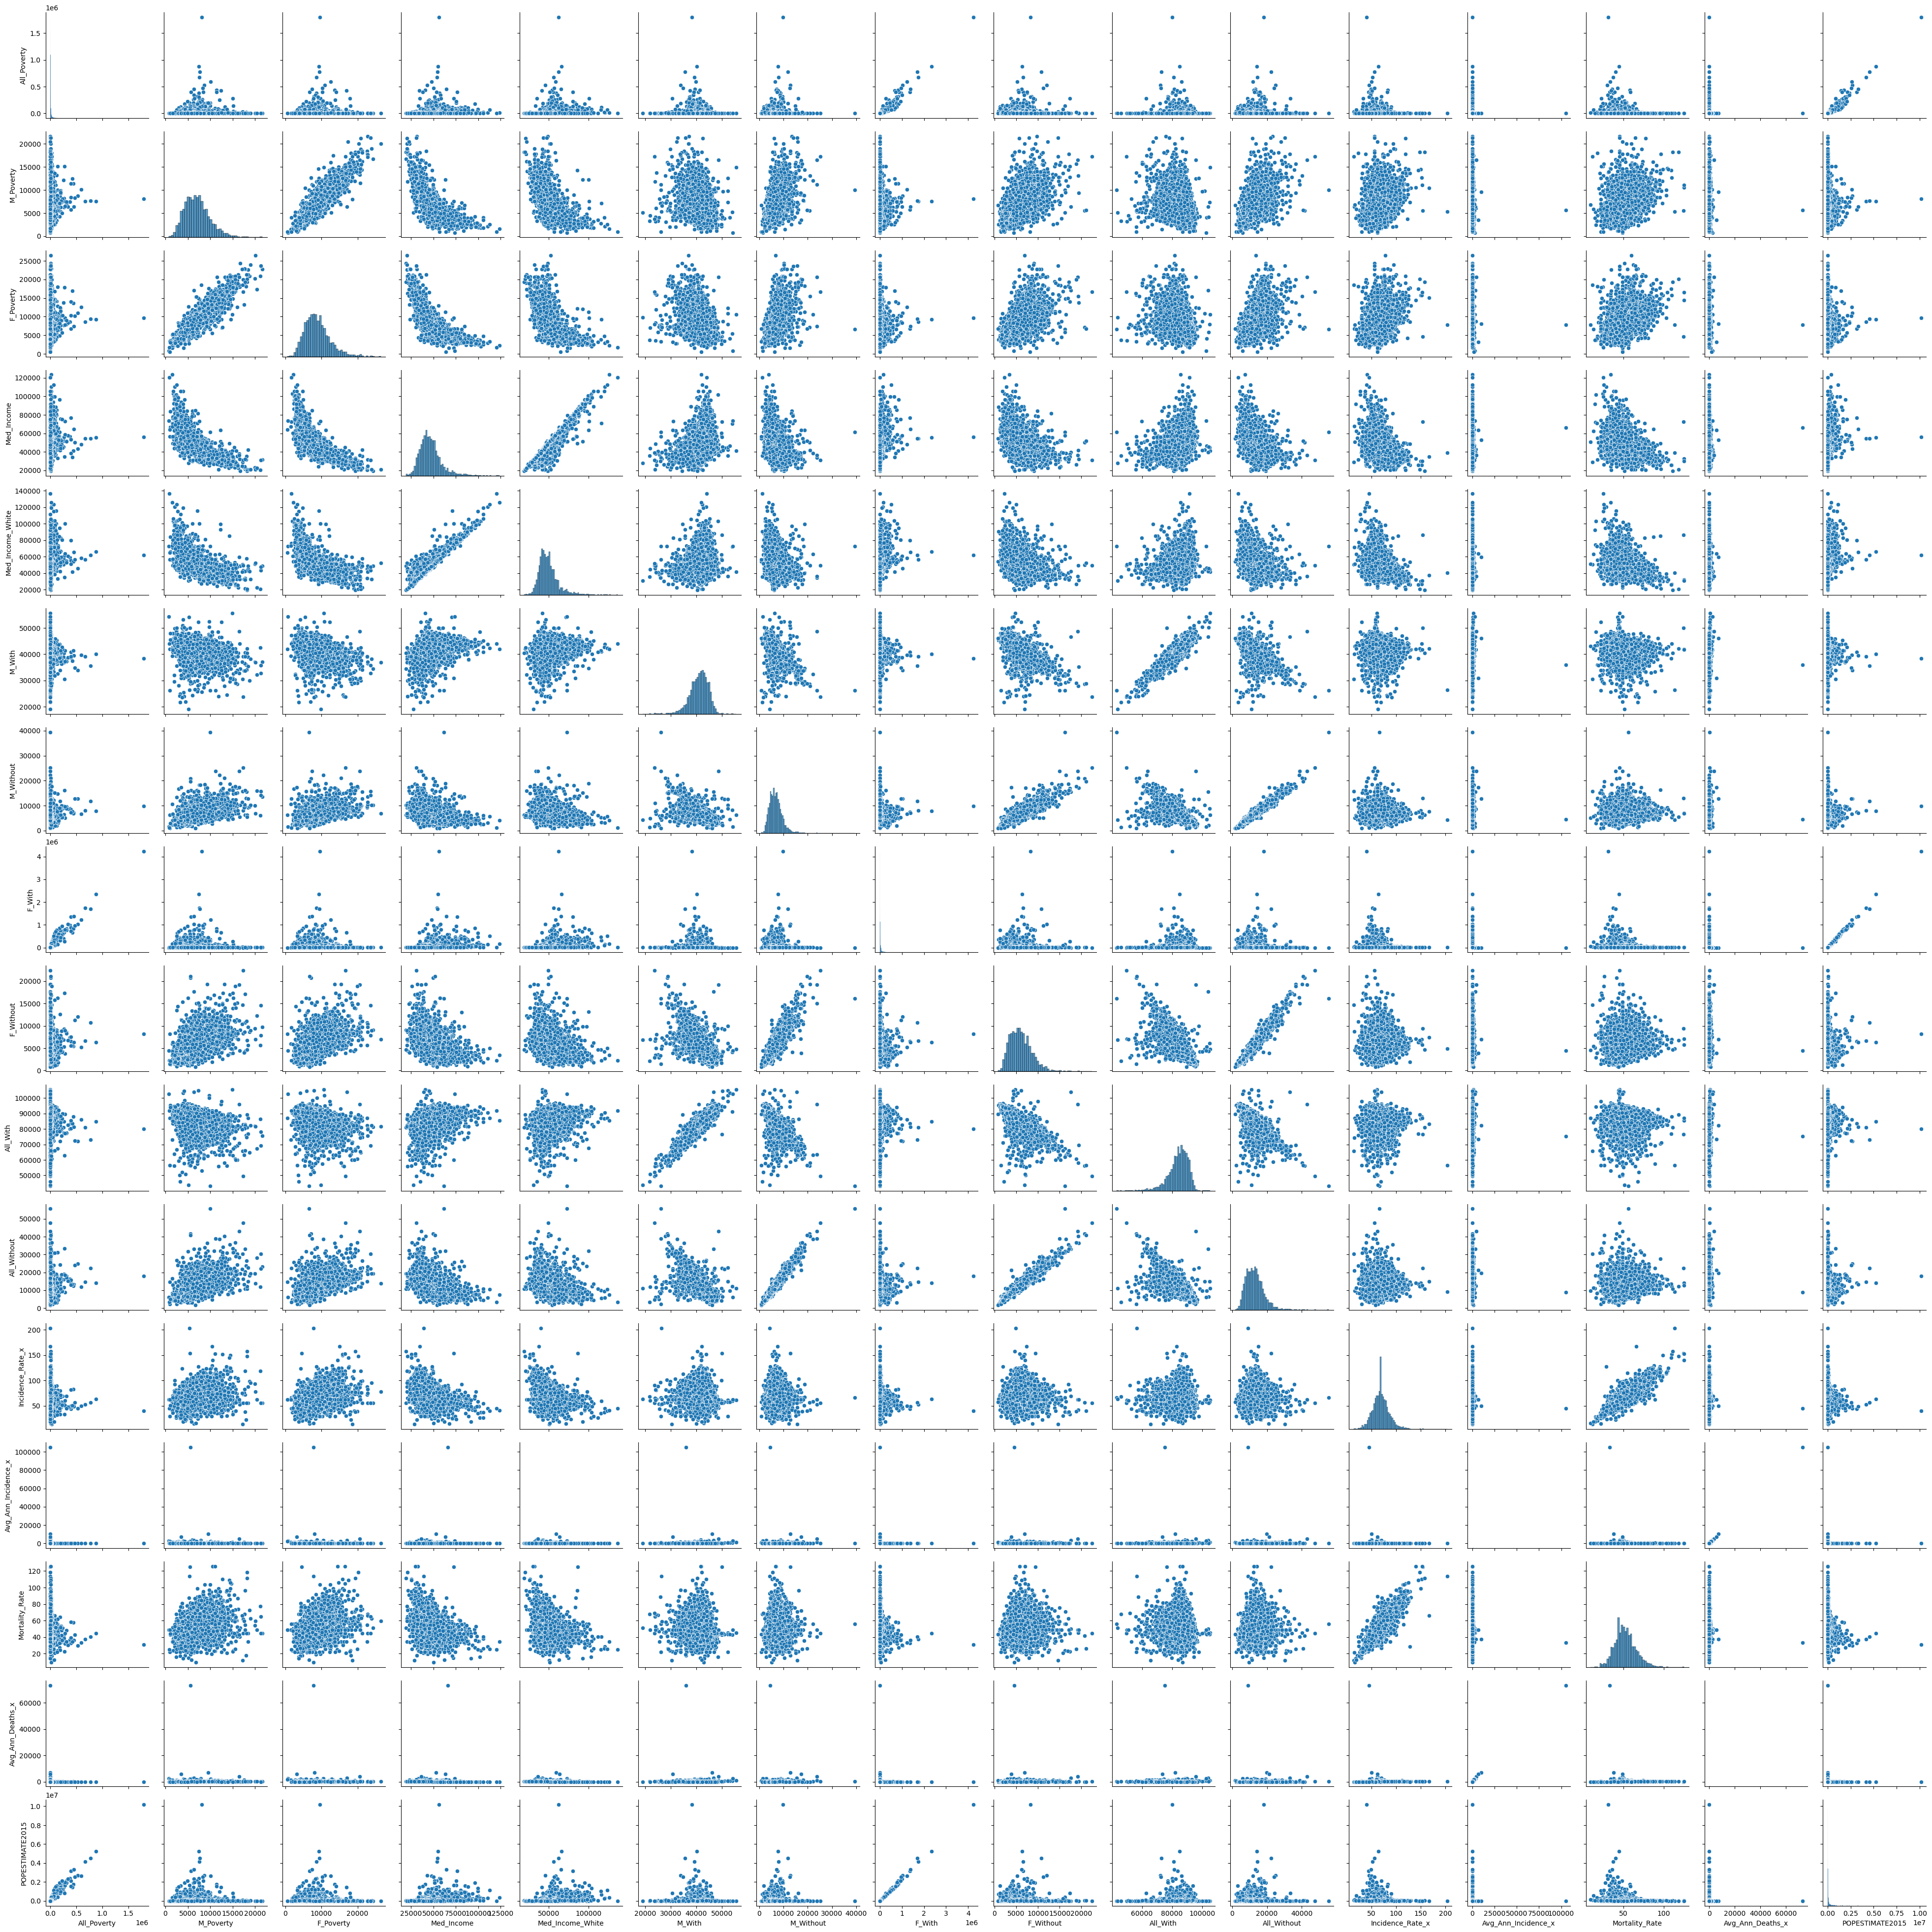

In [111]:
plt.show()

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features. 

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

In [112]:
#removing extra Columns 
final_merge_data.drop(['M_Poverty', 'F_Poverty', 'M_With', 'M_Without', 'F_With', 'F_Without'],axis = True,inplace= True)

#### The above columns have been removed as they are highly correlated with other variables such as M_poverty, F_poverty with All_Poverty, M_with and F_with with All_With and M_without and F_without with All_without

## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks] 

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

In [131]:
Auto = final_merge_data.sample(frac=1).reset_index(drop=True)
Auto_hold_out=Auto[int(0.75*len(Auto)):len(Auto)]

Auto=Auto[0:int(0.75*len(Auto))]

train = np.random.choice(Auto.shape[0], int(2*Auto.shape[0]/3), replace=False)
select = np.in1d(range(Auto.shape[0]), train)
len(select) 

2336

#### I have split the data into 3 sets - train(50%), validation(25%) and test (25%). we have used 25% for validation and test to get the best accuracy for our model. The rest 50% will be used for training the model. 

### 3.2 Model training [15 Marks]
Create three different models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

### For Model training and validation, i have used 3 different approches: Forward Selection, Backward Selection and Non Linear transformations

#### 1. Forward Selection

##### (note: I have shown the first and the last model i arrived at for each of the methods)

In [132]:
#inital forward selection model
import statsmodels.formula.api as smf
lm1 = smf.ols('Mortality_Rate~Incidence_Rate_x', data = Auto[select]).fit()
print(lm1.summary())
preds = lm1.predict(Auto)
square_error = (Auto['Mortality_Rate'] - preds)**2
print('--------Validation MSE for regression model--------')
print('MSE:',np.mean(square_error[~select]))

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:58:43   Log-Likelihood:                -5316.0
No. Observations:                1557   AIC:                         1.064e+04
Df Residuals:                    1555   BIC:                         1.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6774      0.770  

In [133]:
#final forward selection model
lm3 = smf.ols ('Mortality_Rate~Incidence_Rate_x + All_Without + Med_Income', data = Auto[select]).fit()
print(lm3.summary())
preds = lm3.predict(Auto)
square_error = (Auto['Mortality_Rate'] - preds)**2
print('--------Validation MSE for regression model--------')
print('MSE:',square_error[~select].mean())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1518.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:58:45   Log-Likelihood:                -5249.9
No. Observations:                1557   AIC:                         1.051e+04
Df Residuals:                    1553   BIC:                         1.053e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.0957      1.553  

#### 2. Backward Selection

In [134]:
all_columns = "+".join(Auto.columns)
all_columns
#https://stackoverflow.com/questions/22388498/statsmodels-linear-regression-patsy-formula-to-include-all-predictors-in-model

'State+AreaName+All_Poverty+FIPS+Med_Income+Med_Income_White+All_With+All_Without+Incidence_Rate_x+Avg_Ann_Incidence_x+Recent_Trend+Mortality_Rate+Avg_Ann_Deaths_x+POPESTIMATE2015'

In [135]:
#initial backward selection model
lmb1 = smf.ols('Mortality_Rate~All_Poverty+Med_Income+Med_Income_White+All_With+All_Without+Incidence_Rate_x+Avg_Ann_Incidence_x+Avg_Ann_Deaths_x+POPESTIMATE2015', data = Auto[select]).fit()
print(lmb1.summary())
preds = lmb1.predict(Auto)
square_error = (Auto['Mortality_Rate'] - preds)**2
print('--------Validation MSE for regression model--------')
print('MSE:',np.mean(square_error[~select]))

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     520.0
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:58:52   Log-Likelihood:                -5231.8
No. Observations:                1557   AIC:                         1.048e+04
Df Residuals:                    1547   BIC:                         1.054e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0354    

In [136]:
#Final backward selection model
lmb1 = smf.ols('Mortality_Rate~Med_Income+All_Without+Incidence_Rate_x', data = Auto[select]).fit()
print(lmb1.summary())
preds = lmb1.predict(Auto)
square_error = (Auto['Mortality_Rate'] - preds)**2
print('--------Validation MSE for regression model--------')
print('MSE:',np.mean(square_error[~select]))

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1518.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:58:55   Log-Likelihood:                -5249.9
No. Observations:                1557   AIC:                         1.051e+04
Df Residuals:                    1553   BIC:                         1.053e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.0957      1.553  

#### We arrive at the same model using backward selection as well. We do minor changes in R squared due to some variables, but small changes are not worth cost of increasing multiple data. This could be due to the way i have imputed the missing information. Not removing certain variables such as Average Annual Incidence has a minor effect on our model and should not be considered in the model

#### 3. Transformations
##### Based on the previous model we can try interaction terms and quadratic forms in order get a better Rsquared and MSE

In [137]:
#initial transformation model
lmb1 = smf.ols('Mortality_Rate~Med_Income+ I(All_Without ** 2.0) + I(All_Without ** 3.0) + All_Without+Incidence_Rate_x', data = Auto[select]).fit()
print(lmb1.summary())
preds = lmb1.predict(Auto)
square_error = (Auto['Mortality_Rate'] - preds)**2
print('--------Validation MSE for regression model--------')
print('MSE:',np.mean(square_error[~select]))

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     929.1
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:58:59   Log-Likelihood:                -5237.6
No. Observations:                1557   AIC:                         1.049e+04
Df Residuals:                    1551   BIC:                         1.052e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.73

#### While the above transformation produces a better R squared and MSE also increases but we risk falling into the curse of dimensionality. 

### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

#### Based on the above we will choose the model we arrived at using additive method in regression modelling.

In [138]:
lm3 = smf.ols ('Mortality_Rate~Incidence_Rate_x + All_Without + Med_Income', data = Auto[select]).fit()
print(lm3.summary())
preds = lm3.predict(Auto)
square_error = (Auto['Mortality_Rate'] - preds)**2
print('--------Validation MSE for regression model--------')
print('MSE:',square_error[~select].mean())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1518.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:59:04   Log-Likelihood:                -5249.9
No. Observations:                1557   AIC:                         1.051e+04
Df Residuals:                    1553   BIC:                         1.053e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.0957      1.553  

## **Part 4: Model diagnostics [10 marks]**
Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
X = Auto[['Incidence_Rate_x', 'All_Without', 'Med_Income']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)

#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

            feature       VIF
0  Incidence_Rate_x  9.313784
1       All_Without  5.564555
2        Med_Income  6.697614


#### As all the VIF values are below 10, the features are acceptable in our model

## **Part 5: Reporting test performance [5 marks]**
Report the MSE of the final regression model using the test set.

In [140]:
preds_test = lm3.predict(Auto_hold_out)
square_error = (Auto_hold_out['Mortality_Rate'] - preds_test)**2
print('--------Test MSE for regression model--------')
print('MSE:',square_error.mean())

--------Test MSE for regression model--------
MSE: 53.280495022678174


## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.

#### I have tried 2 different models below-regression tree and Baggeed decision trees. I have also reported the MSE's for both the models to evaluate their performance against our linear regression model.



#### First I will try to fit a regression tree and check the MSE for the same 

In [141]:
#improting the required libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

In [142]:
regr_tree = DecisionTreeRegressor(max_depth=3)
regr_tree.fit(Auto[['Incidence_Rate_x', 'All_Without', 'Med_Income']][select],Auto[['Mortality_Rate']][select])

DecisionTreeRegressor(max_depth=3)

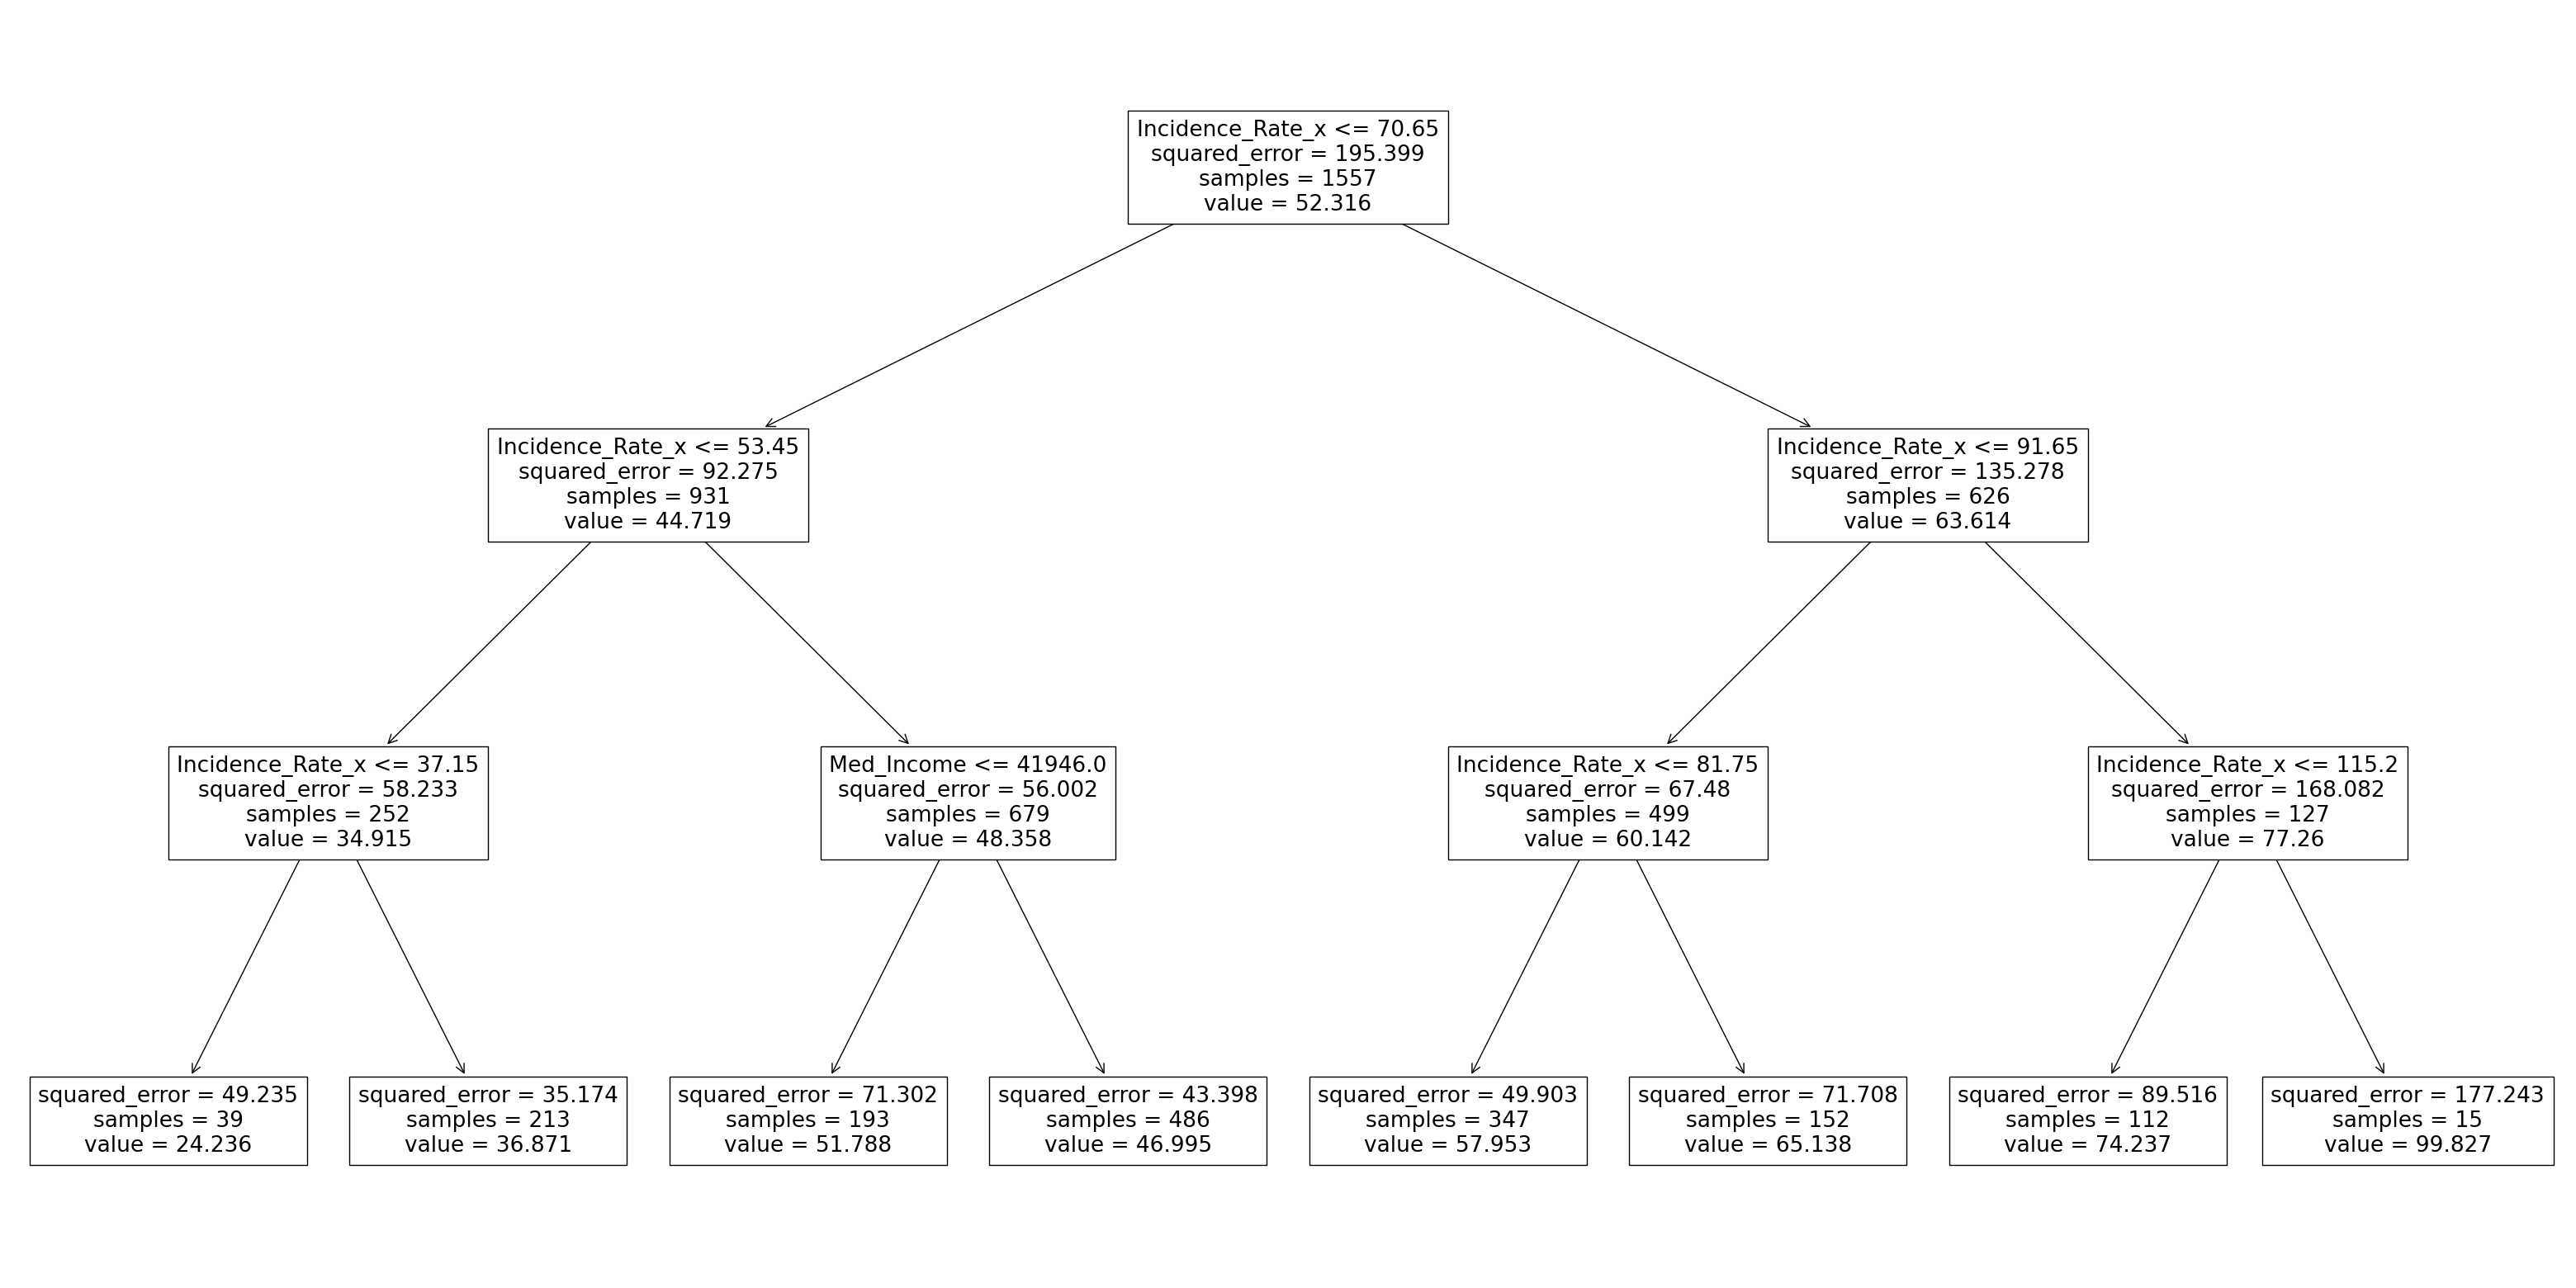

In [143]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
plot_tree(regr_tree, feature_names = Auto[['Incidence_Rate_x', 'All_Without', 'Med_Income']][select].columns)
plt.show()

In [144]:
y_pred = regr_tree.predict(Auto[['Incidence_Rate_x', 'All_Without', 'Med_Income']][~select])
print(mean_squared_error(Auto[['Mortality_Rate']][~select], y_pred))

53.08768430640933


In [145]:
y_pred = regr_tree.predict(Auto_hold_out[['Incidence_Rate_x', 'All_Without', 'Med_Income']])
print(mean_squared_error(Auto_hold_out[['Mortality_Rate']], y_pred))

65.74058989264995


#### Seems like regression tree is not the best method for us. lets try bagged decision tree

In [146]:
all_features = Auto[['Incidence_Rate_x', 'All_Without', 'Med_Income']][select].shape[1]
regr_bagging = RandomForestRegressor(max_features=all_features, random_state=2)
regr_bagging.fit(Auto[['Incidence_Rate_x', 'All_Without', 'Med_Income']][select], Auto[['Mortality_Rate']][select])

C:\Users\stati\AppData\Local\Temp\ipykernel_24668\262138268.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr_bagging.fit(Auto[['Incidence_Rate_x', 'All_Without', 'Med_Income']][select], Auto[['Mortality_Rate']][select])


RandomForestRegressor(max_features=3, random_state=2)

In [147]:
#MSE for the validation set
y_pred = regr_bagging.predict(Auto[['Incidence_Rate_x', 'All_Without', 'Med_Income']][~select])
print(mean_squared_error(Auto[['Mortality_Rate']][~select], y_pred))

52.257337223684225


In [148]:
#getting MSE for the test set
y_pred = regr_bagging.predict(Auto_hold_out[['Incidence_Rate_x', 'All_Without', 'Med_Income']])
print(mean_squared_error(Auto_hold_out[['Mortality_Rate']], y_pred))

57.64299663799748


#### even though bagged trees perform better than regression trees, it still does not perform better than the linear regression method